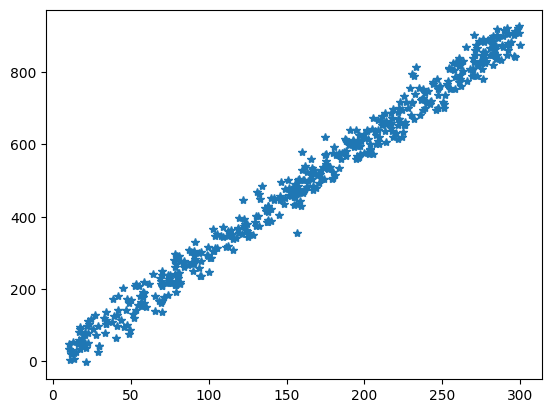

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

N = 500
velocities = np.random.uniform(10, 300, N)
street_road = (3 + np.random.rand(1))*velocities + np.random.normal(0, 30, N)

plt.plot(velocities, street_road, '*')
plt.show()

In [15]:
reg = LinearRegression()
reg.fit(velocities.reshape(-1, 1), street_road)
reg.coef_

array([3.05399064])

=> street_road = 3.05 * velocity

In [22]:
one_mat = np.ones(N)
X = np.stack([velocities, one_mat], axis=1)
y = street_road

reg2 = LinearRegression()
reg2.fit(X, y)
reg2.coef_

array([3.05399064, 0.        ])

array([1.05450254, 0.        ])

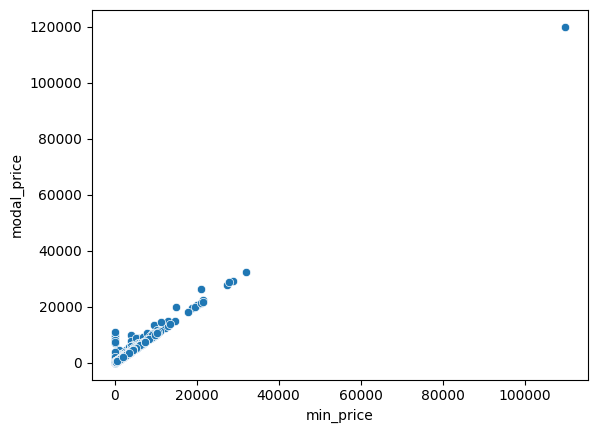

In [36]:
import os
import seaborn as sns
import pandas as pd

df = pd.read_csv("samp1.csv")
df = df[["min_price", "modal_price"]]
sns.scatterplot(df, x="min_price", y="modal_price")

reg3 = LinearRegression()
df["intercept"] = 1
X = df.drop(columns="modal_price")
y = df["modal_price"]

reg3.fit(X, y)
reg3.coef_

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


array([50.76213167,  3.29286254, 17.83639105,  0.        ])

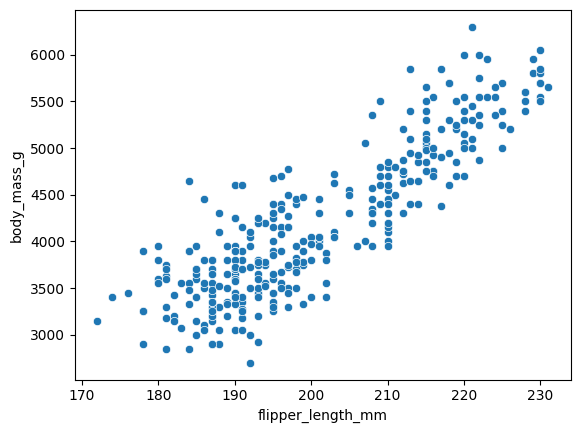

In [49]:
df2 = pd.read_csv("penguins.csv")
df2 = df2.dropna()
display(df2.head())
sns.scatterplot(df2[["flipper_length_mm", "body_mass_g"]], x="flipper_length_mm", y="body_mass_g")

reg4 = LinearRegression(fit_intercept=True)
df2["intercept"] = 1
X = df2[["flipper_length_mm", "bill_length_mm", "bill_depth_mm", "intercept"]]
y = df2["body_mass_g"]
reg4.fit(X, y)
reg4.coef_

In [55]:
# pip install statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

tab = smf.ols('body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm', data=df2).fit()
print(tab.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          9.26e-103
Time:                        03:30:37   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.13